In [23]:
import torch 
from torch import nn
import os
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from pathlib import Path
data_path = Path("archive/")
image_path = data_path / "data2"
train_dir = image_path / "training_data"
test_dir = image_path / "testing_data"

train_dir, test_dir

(WindowsPath('archive/data2/training_data'),
 WindowsPath('archive/data2/testing_data'))

In [25]:
from torch.utils.data import DataLoader
from torchvision import transforms

data_transform = transforms.Compose([
  # Resize our images to 64x64
  transforms.Resize(size=(32, 32)),
  # Flip the images randomly on the horizontal
#   transforms.RandomHorizontalFlip(p=0.5),
  # Turn the image into a torch.Tensor
  transforms.ToTensor(),
  transforms.Grayscale(num_output_channels=1)   
])

In [26]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # a transform for the data
                                  target_transform=None) # a transform for the label/target 

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 20628
     Root location: archive\data2\training_data
     StandardTransform
 Transform: Compose(
                Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
                Grayscale(num_output_channels=1)
            ),
 Dataset ImageFolder
     Number of datapoints: 3241
     Root location: archive\data2\testing_data
     StandardTransform
 Transform: Compose(
                Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
                Grayscale(num_output_channels=1)
            ))

In [27]:
len(train_data)

20628

In [28]:
class_dict = train_data.class_to_idx
class_dict

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'A': 10,
 'B': 11,
 'C': 12,
 'D': 13,
 'E': 14,
 'F': 15,
 'G': 16,
 'H': 17,
 'I': 18,
 'J': 19,
 'K': 20,
 'L': 21,
 'M': 22,
 'N': 23,
 'O': 24,
 'P': 25,
 'Q': 26,
 'R': 27,
 'S': 28,
 'T': 29,
 'U': 30,
 'V': 31,
 'W': 32,
 'X': 33,
 'Y': 34,
 'Z': 35}

In [29]:
class_name = train_data.classes
class_name

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [30]:
train_data.samples[1]

('archive\\data2\\training_data\\0\\44440.png', 0)

In [31]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.8627, 0.8705, 0.8627,  ..., 0.8705, 0.8666, 0.8666],
         [0.8783, 0.8705, 0.8705,  ..., 0.8744, 0.8666, 0.8705],
         [0.8666, 0.8744, 0.8705,  ..., 0.8823, 0.8783, 0.8862],
         ...,
         [0.8744, 0.8783, 0.8783,  ..., 0.8783, 0.8783, 0.8744],
         [0.8666, 0.8627, 0.8666,  ..., 0.8823, 0.8666, 0.8587],
         [0.8627, 0.8744, 0.8744,  ..., 0.8666, 0.8862, 0.8783]]])
Image shape: torch.Size([1, 32, 32])
Image datatype: torch.float32
Image label: 0
Label datatype: <class 'int'>


In [32]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2492ad104d0>,
 <torch.utils.data.dataloader.DataLoader at 0x2492d1988d0>)

In [33]:
len(train_dataloader), len(test_dataloader)

(645, 102)

In [34]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, you can change the batch size if you like
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 1, 32, 32]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


torch.Size([1, 32, 32])

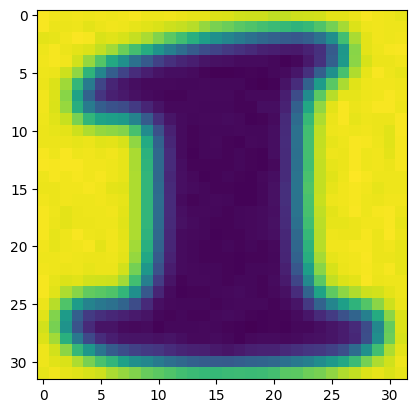

In [35]:
plt.imshow(train_data[1000][0].squeeze())
train_data[1000][0].shape

Number of patches per row: 4.0  
Number of patches per column: 4.0  
Total patches: 16.0  
Patch size: 8 pixels x 8 pixels


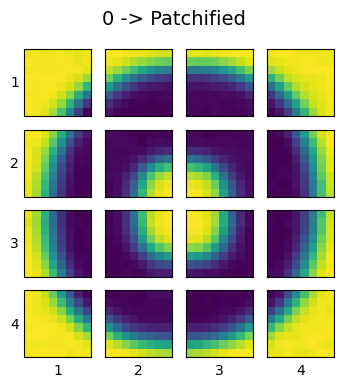

In [36]:
# Setup code to plot whole image as patches
image_permuted = train_data[0][0].permute(1,2,0)
label =train_data[0][1]

img_size = 32
patch_size = 8
num_patches = img_size/patch_size 
assert img_size % patch_size == 0, "Image size must be divisible by patch size"
print(f"Number of patches per row: {num_patches}\
  \nNumber of patches per column: {num_patches}\
  \nTotal patches: {num_patches*num_patches}\
  \nPatch size: {patch_size} pixels x {patch_size} pixels")

# Create a series of subplots
fig, axs = plt.subplots(nrows=img_size // patch_size,
                        ncols=img_size // patch_size,
                        figsize=(num_patches, num_patches),
                        sharex=True,
                        sharey=True)

# Loop through height and width of image
for i, patch_height in enumerate(range(0, img_size, patch_size)): # iterate through height
  for j, patch_width in enumerate(range(0, img_size, patch_size)):
    # Plot the permuted image on the different axes 
    axs[i, j].imshow(image_permuted[patch_height:patch_height+patch_size, # iterate through height
                                    patch_width:patch_width+patch_size, # iterate through width
                                    :]) # get all color channels
    # Set up label information for each subplot (patch)
    axs[i, j].set_ylabel(i+1,
                         rotation="horizontal",
                         horizontalalignment="right",
                         verticalalignment="center")
    axs[i, j].set_xlabel(j+1)
    axs[i, j].set_xticks([])
    axs[i, j].set_yticks([])
    axs[i, j].label_outer()

# Set up a title for the plot
fig.suptitle(f"{class_name[label]} -> Patchified", fontsize=14)
plt.show()

In [37]:
# 1. Create a class called PatchEmbedding
class PatchEmbedding(nn.Module):
  # 2. Initilaize the layer with appropriate hyperparameters
  def __init__(self,
               in_channels:int=1,
               patch_size:int=8,
               embedding_dim:int=64): # from Table 1 for ViT-Base
    super().__init__()

    self.patch_size = patch_size
  
    # 3. Create a layer to turn an image into embedded patches
    self.patcher = nn.Conv2d(in_channels=in_channels,
                             out_channels=embedding_dim,
                             kernel_size=patch_size,
                             stride=patch_size,
                             padding=0)
    
    # 4. Create a layer to flatten feature map outputs of Conv2d
    self.flatten = nn.Flatten(start_dim=2,
                              end_dim=3)
    
  # 5. Define a forward method to define the forward computation steps
  def forward(self, x):
    # Create assertion to check that inputs are the correct shape
    image_resolution = x.shape[-1]
    assert image_resolution % patch_size == 0, f"Input image size must be divisible by patch size, image shape: {image_resolution}, patch size: {self.patch_size}"

    # Perform the forward pass
    x_patched = self.patcher(x) 
    x_flattened = self.flatten(x_patched)
    # 6. Make the returned sequence embedding dimensions are in the right order (batch_size, number_of_patches, embedding_dimension)
    return x_flattened.permute(0, 2, 1)


In [38]:
torch.manual_seed(42)

# Create an instance of patch embedding layer
patchify = PatchEmbedding(in_channels=1,
                          patch_size=8,
                          embedding_dim=64)

# Pass a single image through patch embedding layer
print(f"Input image size: {train_data[0][0].unsqueeze(0).shape}")
patch_embedded_image = patchify(train_data[0][0].unsqueeze(0)) # add an extra batch dimension
print(f"Output patch embedding sequence shape: {patch_embedded_image.shape}")

Input image size: torch.Size([1, 1, 32, 32])
Output patch embedding sequence shape: torch.Size([1, 16, 64])


In [39]:
patch_embedded_image

tensor([[[ 0.4689, -1.0576,  0.1939,  ...,  0.3344,  0.2627,  0.5901],
         [ 0.3855, -0.2247,  0.1355,  ..., -0.0054,  0.3526,  0.4858],
         [ 0.3549, -0.1911,  0.0733,  ..., -0.0311,  0.2553,  0.5321],
         ...,
         [ 0.0155, -0.7253,  0.1492,  ...,  0.1541,  0.0979, -0.0377],
         [ 0.0347, -0.7641,  0.1041,  ...,  0.1323,  0.0941, -0.0051],
         [ 0.2368, -1.1744,  0.1131,  ...,  0.5254,  0.1013,  0.4422]]],
       grad_fn=<PermuteBackward0>)

In [40]:
class ViT(nn.Module): 
    def __init__(self,
               img_size:int=32, # Table 3 from the ViT paper
               in_channels:int=1,
               patch_size:int=8, 
               num_transformer_layers:int=2, # Table 1 for "Layers" for ViT-Base
               embedding_dim:int=64, # Hidden size D from Table 1 for ViT-Base
               mlp_size:int=64, # Table 1
               num_heads:int=2, # Table 1
               attn_dropout:int=0,
               mlp_dropout:int=0.1,
               embedding_dropout:int=0.1, # Dropout for patch and position embeddings
               num_classes:int=36): # number of classes in our classification problem
        super().__init__()

        self.num_patches = (img_size * img_size) // patch_size**2

        self.patch_embedding = PatchEmbedding(in_channels=in_channels,patch_size=patch_size,embedding_dim=embedding_dim)

        self.class_token = nn.Parameter(torch.randn(1,1,embedding_dim),requires_grad=True)

        self.positional_embedding = nn.Parameter(torch.randn(1,17,embedding_dim))

        self.dropout = nn.Dropout(p=embedding_dropout)

#         self.transformer_encoder_layer= nn.TransformerEncoderLayer(d_model=embedding_dim,
#                                                          nhead = num_heads,
#                                                          dim_feedforward=mlp_size,
#                                                          dropout=0.1,
#                                                          activation = "gelu",
#                                                          batch_first=True,
#                                                          norm_first=True)

        self.transformer_encoder = nn.TransformerEncoder(encoder_layer = nn.TransformerEncoderLayer(d_model=embedding_dim,
                                                         nhead = num_heads,
                                                         dim_feedforward=mlp_size,
                                                         dropout=0.1,
                                                         activation = "gelu",
                                                         batch_first=True,
                                                         norm_first=True),num_layers=num_transformer_layers)
        
            # Create classifier head
        self.classifier = nn.Sequential(
            nn.LayerNorm(normalized_shape=embedding_dim),
            nn.Linear(in_features=embedding_dim,
                      out_features=num_classes)
        )
    
    def forward(self,x):
        batch_size = x.shape[0]
        
        class_token = self.class_token.expand(batch_size, -1, -1) # "-1" means to infer the dimensions
        x = self.patch_embedding(x)
        x = torch.cat((class_token, x), dim=1)
#         print(x.shape)
        
        x = self.positional_embedding + x
        
        x = self.dropout(x)

        x = self.transformer_encoder(x)

        x = self.classifier(x[:, 0])

        return x 

        
        

In [41]:
torch.manual_seed(42)
vit = ViT(num_classes=36)

# Pass the random image tensor to our ViT instance
vit(train_data[0][0].unsqueeze(0))

tensor([[-0.5474,  0.3886,  0.9171,  0.4183, -0.1946, -0.2359,  0.2206,  0.1926,
          0.9267, -0.0030, -0.0825, -0.5517,  1.0194, -1.0225, -0.3656, -0.2443,
          0.2121,  0.2814,  0.7671,  0.2993, -0.1771,  0.2461, -0.5261,  0.7746,
         -0.2434,  0.0063, -0.2855,  0.4956,  0.1114,  0.5046, -0.0013, -0.5472,
         -0.4883, -0.2983,  0.3588,  0.1217]], grad_fn=<AddmmBackward0>)

In [42]:
len(class_name)

36

In [43]:
from torchinfo import summary

summary(model=ViT(num_classes=len(class_name)),
        input_size=(32, 1, 32, 32), # (batch_size, color_channels, height, width)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
ViT (ViT)                                          [32, 1, 32, 32]      [32, 36]             1,152                True
├─PatchEmbedding (patch_embedding)                 [32, 1, 32, 32]      [32, 16, 64]         --                   True
│    └─Conv2d (patcher)                            [32, 1, 32, 32]      [32, 64, 4, 4]       4,160                True
│    └─Flatten (flatten)                           [32, 64, 4, 4]       [32, 64, 16]         --                   --
├─Dropout (dropout)                                [32, 17, 64]         [32, 17, 64]         --                   --
├─TransformerEncoder (transformer_encoder)         [32, 17, 64]         [32, 17, 64]         --                   True
│    └─ModuleList (layers)                         --                   --                   --                   True
│    │    └─TransformerEncoderLayer (0)        

In [44]:
loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(params=vit.parameters(),
                             lr=0.00003)

In [45]:
def acc_fn(y_preds,y_blob_test):
    count = 0
    for i in range(len(y_preds)):
        if y_preds[i] == y_blob_test[i]:
            count+=1
    return count*100/len(y_preds)

In [46]:
from tqdm import tqdm

# Create train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer):
    correct=0
  # Put the model in train mode
    model.train()

  # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

  # Loop through data loader data batches
    for batch, (X, y) in tqdm(enumerate(dataloader)):

    # 1. Forward pass
        y_pred = model(X) # output model logits

    # 2. Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

    # 3. Optimizer zero grad
        optimizer.zero_grad()

    # 4. Loss backward
        loss.backward()

    # 5. Optimizer step
        optimizer.step()

    # Calculate accuracy metric
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        
        for i in range(len(y_pred_class)):
            if(int(y_pred_class[i]) == int(y[i])):
                correct+=1
#         print(y_pred_class)
#         print(y)
# #         if torch.eq(y_pred_class,y) :
#         if int(y_pred_class) == int(y):
#             correct+=1
#         train_acc += (y_pred_class==y).sum().item()/len(y_pred)
  
  # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = correct*100 / len(train_data) 
    return train_loss, train_acc 

In [47]:
# Create a test step
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
  # Put model in eval mode
    model.eval()
    correct=0
  # Setup test loss and test accuracy values
    test_loss, test_acc = 0,  0

  # Turn on inference mode
    with torch.inference_mode():
    # Loop through DataLoader batches
        for batch, (X, y) in tqdm(enumerate(dataloader)): 

      # 1. Forward pass
            test_pred_logits = model(X)

      # 2. Calculate the loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

      # Calculate the accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            for i in range(len(test_pred_labels)):
                if(int(test_pred_labels[i]) == int(y[i])):
                    correct+=1
  # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = correct*100 / len(test_data)
    return test_loss, test_acc

In [48]:
# 1. Create a train function that takes in various model parameters + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 10):
  
  # 2. Create empty results dictionary
    results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}
  
  # 3. Loop through training and testing steps for a number of epochs
    for epoch in range(epochs):
        train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)
    
    # 4. Print out what's happening
        print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
  
  # 6. Return the filled results at the end of the epochs
    return results

In [72]:
# Set random seeds
torch.manual_seed(42) 

# Set number of epochs
NUM_EPOCHS = 100

# Train model_0
vit_results = train(model=vit,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

645it [00:38, 16.57it/s]
102it [00:06, 15.21it/s]


Epoch: 0 | Train loss: 0.8094 | Train acc: 74.9952 | Test loss: 0.3288 | Test acc: 89.0774


645it [00:38, 16.81it/s]
102it [00:06, 15.07it/s]


Epoch: 1 | Train loss: 0.8007 | Train acc: 75.6157 | Test loss: 0.3313 | Test acc: 88.9540


645it [00:42, 15.16it/s]
102it [00:06, 15.37it/s]


Epoch: 2 | Train loss: 0.8061 | Train acc: 75.2085 | Test loss: 0.3289 | Test acc: 89.0466


645it [00:38, 16.92it/s]
102it [00:06, 15.68it/s]


Epoch: 3 | Train loss: 0.7945 | Train acc: 75.4315 | Test loss: 0.3301 | Test acc: 88.9540


645it [00:36, 17.50it/s]
102it [00:06, 14.99it/s]


Epoch: 4 | Train loss: 0.8019 | Train acc: 75.6060 | Test loss: 0.3287 | Test acc: 89.1392


645it [00:36, 17.71it/s]
102it [00:06, 16.32it/s]


Epoch: 5 | Train loss: 0.8074 | Train acc: 75.3539 | Test loss: 0.3298 | Test acc: 88.9849


645it [00:36, 17.58it/s]
102it [00:07, 14.42it/s]


Epoch: 6 | Train loss: 0.8121 | Train acc: 75.1794 | Test loss: 0.3274 | Test acc: 88.9540


645it [00:37, 17.05it/s]
102it [00:06, 16.09it/s]


Epoch: 7 | Train loss: 0.8166 | Train acc: 75.1406 | Test loss: 0.3362 | Test acc: 89.1083


645it [00:36, 17.79it/s]
102it [00:07, 14.22it/s]


Epoch: 8 | Train loss: 0.8006 | Train acc: 75.2085 | Test loss: 0.3250 | Test acc: 89.0774


645it [00:37, 17.31it/s]
102it [00:06, 15.92it/s]


Epoch: 9 | Train loss: 0.8112 | Train acc: 74.9176 | Test loss: 0.3314 | Test acc: 88.9849


112it [00:06, 17.16it/s]


KeyboardInterrupt: 

In [51]:
# print(vit_results)

{'train_loss': [1.1618178362070128, 1.1430982236714327, 1.1487995036812715, 1.1387720403745192, 1.1447693115056947], 'train_acc': [64.20399457048671, 64.91177040915261, 64.68392476245879, 65.01357378320729, 64.65483808415746], 'test_loss': [0.5781810216459573, 0.5679586307675231, 0.5664459008212183, 0.5601505415112364, 0.578780870811612], 'test_acc': [81.17864856525763, 80.68497377352669, 81.6414686825054, 81.51804998457266, 80.16044430731256]}


In [7]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "OCR2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=vit.state_dict(),
           f=MODEL_SAVE_PATH) 

In [49]:
# Load a PyTorch model

# Create a new instance of lienar regression model V2
loaded_model_vit = ViT()

# Load the saved model_1 state_dict
loaded_model_vit.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_vit

ViT(
  (patch_embedding): PatchEmbedding(
    (patcher): Conv2d(1, 64, kernel_size=(8, 8), stride=(8, 8))
    (flatten): Flatten(start_dim=2, end_dim=3)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=64, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=64, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (classifier): Sequential(
    (0): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
 

In [50]:
def make_predictions(model: torch.nn.Module,
                     data: list):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob)

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [59]:
import random
# random.seed(42)
test_samples = [] 
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 32, 32])

In [60]:
pred_probs = make_predictions(model=loaded_model_vit,
                              data=test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[1.7623e-07, 5.3958e-16, 6.6347e-09, 2.9112e-12, 8.0710e-13, 9.3582e-11,
         1.2236e-04, 1.0467e-13, 9.8256e-08, 1.6541e-09, 2.9229e-09, 1.0174e-03,
         2.9428e-06, 5.4607e-08, 9.9490e-01, 3.6867e-03, 1.6255e-04, 2.0214e-06,
         8.5248e-12, 6.3013e-15, 2.2941e-07, 2.9315e-06, 3.6005e-09, 9.2320e-10,
         3.6946e-08, 1.0458e-04, 1.7450e-08, 2.3663e-07, 7.0988e-12, 8.4521e-17,
         1.3940e-08, 2.2062e-12, 7.5723e-15, 7.7214e-16, 1.0966e-11, 7.6260e-09],
        [4.5438e-03, 2.3274e-05, 3.4196e-03, 6.0636e-06, 1.2000e-03, 6.6339e-05,
         2.8199e-04, 4.6187e-04, 1.2601e-06, 5.0643e-02, 2.1181e-04, 4.1224e-05,
         3.1126e-03, 1.7178e-04, 7.0852e-05, 2.5956e-04, 8.4313e-03, 1.6361e-05,
         7.4724e-05, 8.6287e-05, 6.3464e-06, 2.3326e-05, 1.6036e-05, 4.4138e-07,
         3.2836e-03, 8.8151e-04, 9.0262e-01, 1.6429e-04, 2.7370e-06, 2.5403e-04,
         9.0232e-04, 1.7221e-02, 1.9461e-04, 3.2892e-05, 2.3167e-04, 1.0378e-03]])

In [61]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([14, 26,  0, 29, 29,  2, 34, 10, 32])

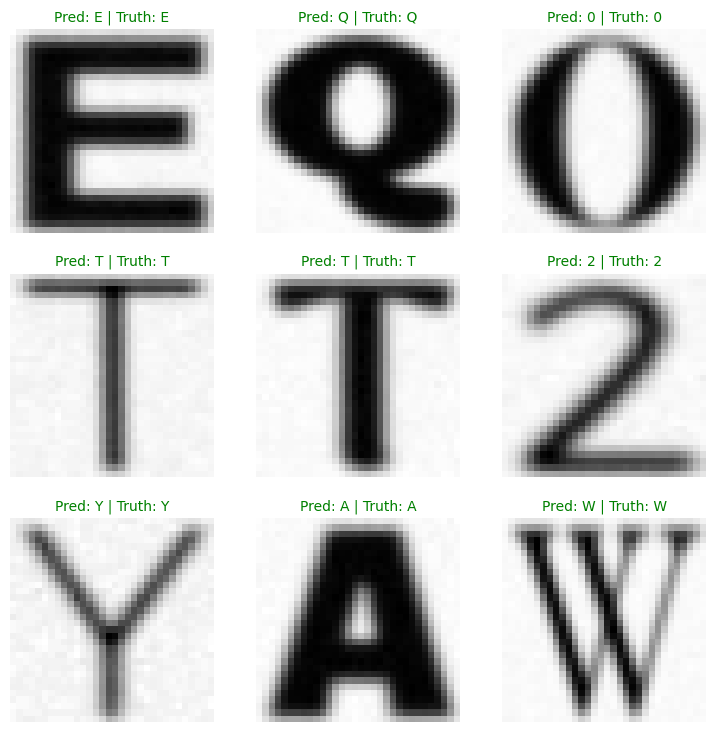

In [62]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_name[pred_classes[i]]

  # Get the truth label (in text form) 
  truth_label = class_name[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r") 
  
  plt.axis(False);

In [55]:
from tqdm.auto import tqdm 


# 1. Make predictions with trained model
y_preds = []
vit.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send the data and targets to target device
    # Do the forward pass
    y_logit = vit(X)
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/102 [00:07<?, ?it/s]

tensor([28, 16, 32,  ..., 32, 32,  8])

In [171]:
!pip install mlxtend  


                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB 660.6 kB/s eta 0:00:03
     -                                        0.1/1.4 MB 550.5 kB/s eta 0:00:03
     --                                       0.1/1.4 MB 512.0 kB/s eta 0:00:03
     --                                       0.1/1.4 MB 512.0 kB/s eta 0:00:03
     ---                                      0.1/1.4 MB 437.6 kB/s eta 0:00:03
     ---                                      0.1/1.4 MB 437.6 kB/s eta 0:00:03
     ---                                      0.1/1.4 MB 361.0 kB/s eta 0:00:04
     ----                                     0.1/1.4 MB 388.1 kB/s eta 0:00:04
     -----                                    0.2/1.4 MB 374.9 kB/s eta 0:00:04
     -----                                    0.2/1.4 MB 393.8 kB/s

In [56]:
torch.tensor(test_data.targets).ndim

1

In [57]:
y_pred_tensor[:10]

tensor([28, 16, 32, 15, 34, 11, 32, 34, 32, 34])

C:\Users\KSIPL\AppData\Roaming\Python\Python311\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


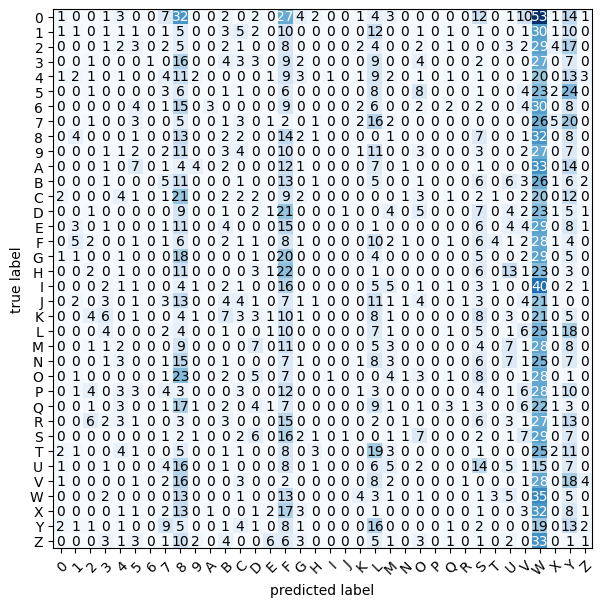

In [58]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_name),task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=torch.tensor(test_data.targets))

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_name,
    figsize=(10, 7)
)